In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


In [29]:
# importing necessary library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [5]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv', encoding='latin1')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df = df[df.columns[:12]]
df.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Checking for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Dealing with missing data
- replace blank countries with the mode (most common) country
- keep director as it could be interesting to look at a certain director's films
- keep cast as it could be interesting to look at a certain cast's films

In [9]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

df.dropna(inplace=True)
df.drop_duplicates(inplace= True)

In [10]:
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [11]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  month_added   8790 non-null   object        
 13  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 995.7+ KB


### **EDA**

<Axes: ylabel='count'>

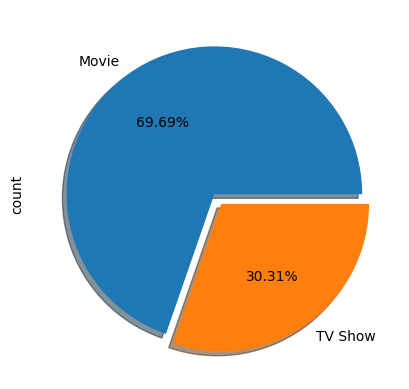

In [30]:
# Creating our pie chart with labels
df["type"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.08], shadow = True)

### **Lets see the top 10 that have content on Netfilx**

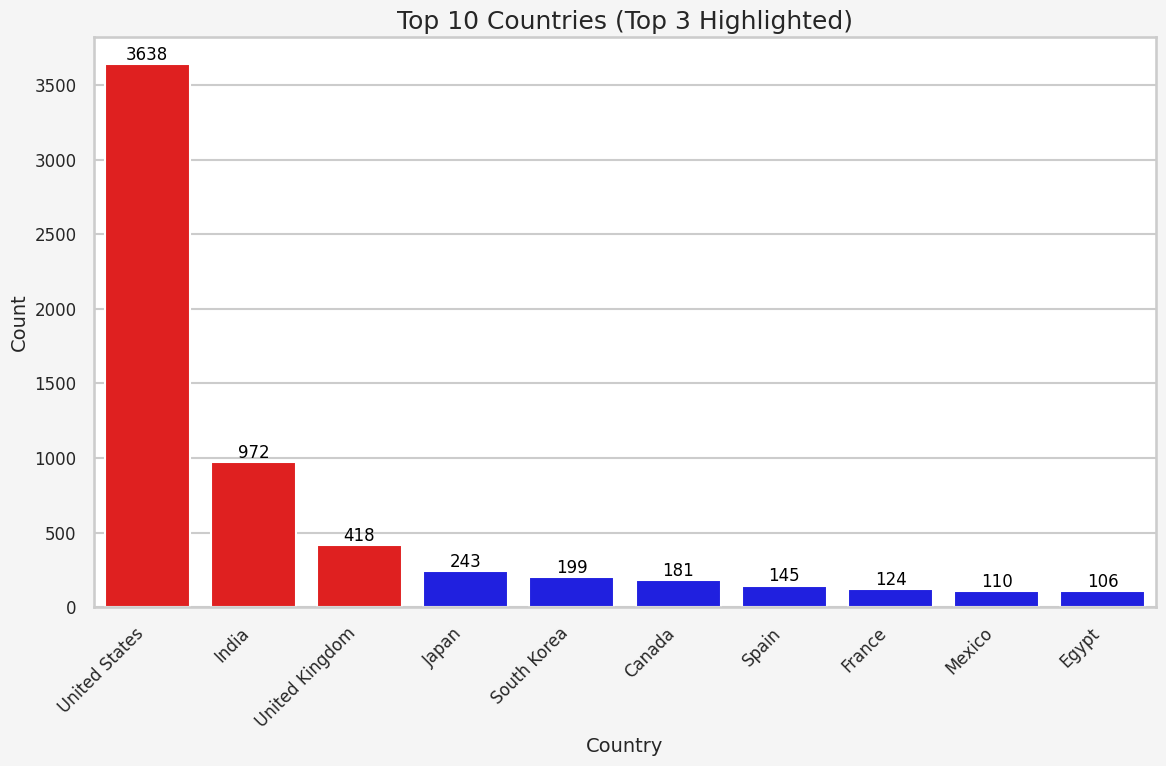

In [35]:

country_counts = df['country'].value_counts().head(10)

# Create a color palette with the top 3 countries highlighted in red
palette = ['red' if i < 3 else 'blue' for i in range(10)]

# Set plot style and context
sns.set(style="whitegrid", context="talk")

# Create the bar chart with Seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size as desired
bars = sns.barplot(x=country_counts.index, y=country_counts.values, palette=palette)

# Adding count values on top of bars
for bar, count in zip(bars.patches, country_counts.values):
    yval = bar.get_height()
    bars.annotate(f'{count}', (bar.get_x() + bar.get_width() / 2, yval + 0.2), 
                  ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Countries (Top 3 Highlighted)', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Set the background color to whitesmoke
plt.gcf().set_facecolor('whitesmoke')

plt.tight_layout()

# Display the plot
plt.show()


In [37]:
# Counting movies and TV shows per country
movie_counts_country = df[df['type'] == 'Movie']['country'].value_counts()
tv_show_counts_country = df[df['type'] == 'TV Show']['country'].value_counts()

df_counts = pd.DataFrame({'Movie': movie_counts_country, 'TV Show': tv_show_counts_country})
df_counts['total_by_country'] = df_counts.sum(axis=1)

top_10_counts = df_counts.sort_values(by='total_by_country', ascending=False).head(10)

print(top_10_counts)

                 Movie  TV Show  total_by_country
country                                          
United States   2494.0   1144.0            3638.0
India            893.0     79.0             972.0
United Kingdom   206.0    212.0             418.0
Japan             76.0    167.0             243.0
South Korea       41.0    158.0             199.0
Canada           122.0     59.0             181.0
Spain             97.0     48.0             145.0
France            75.0     49.0             124.0
Mexico            70.0     40.0             110.0
Egypt             92.0     14.0             106.0


## We already know top 10 countries.
### Next, we will compare between Movie and TV Show for top 10 countries.

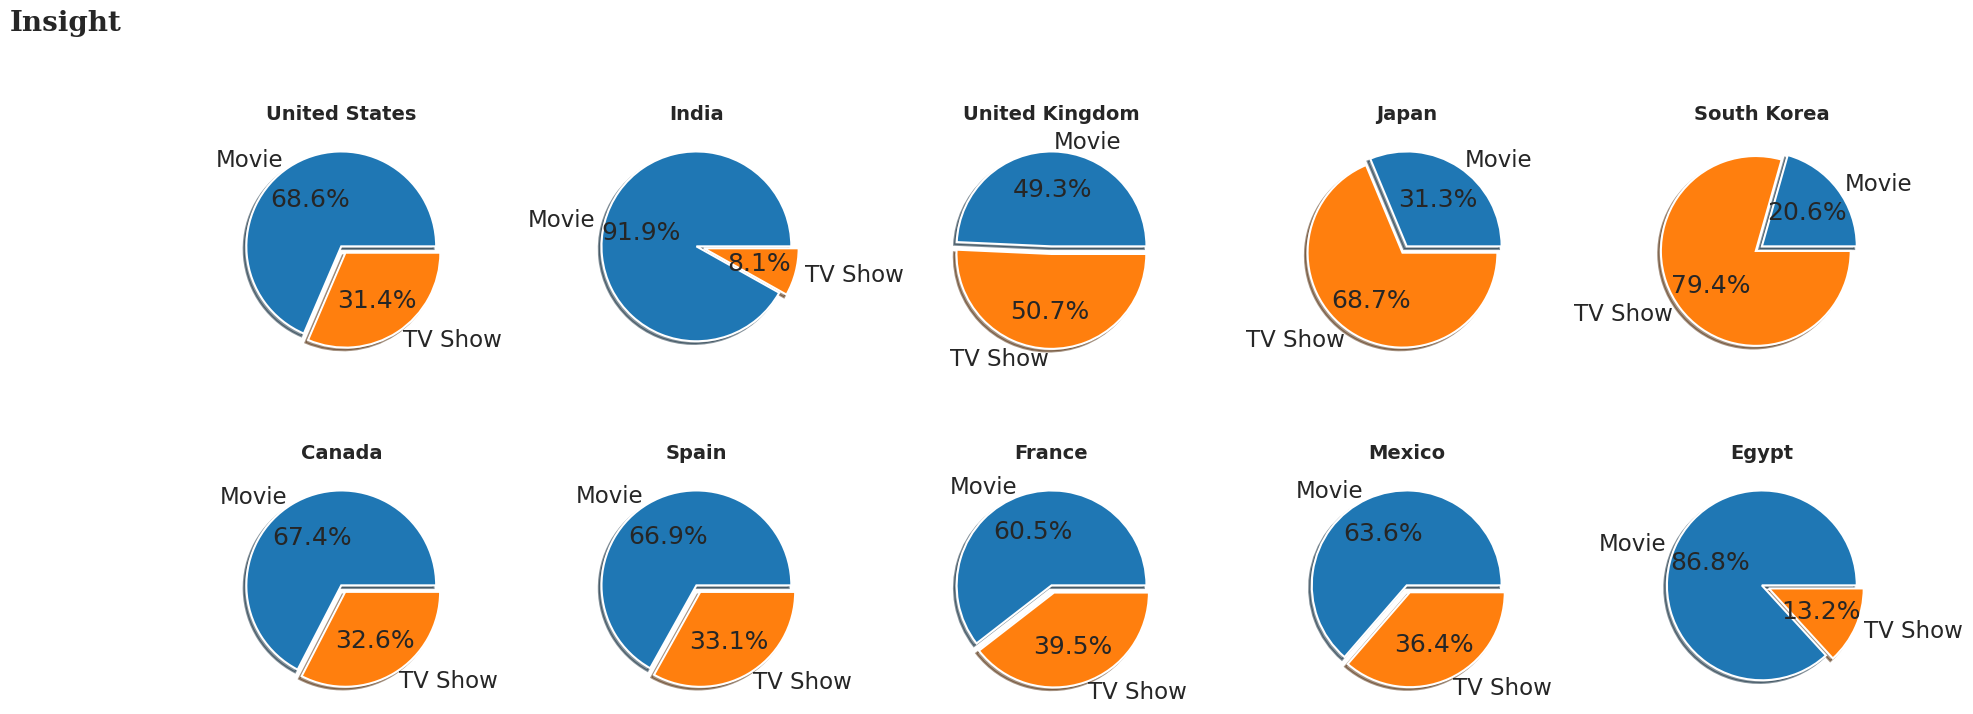

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming top_10_counts is your DataFrame with the top 10 countries and their movie and TV show counts

# Set Seaborn style
sns.set(style="whitegrid", context="talk")

# Create subplots
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(18, 8))  # Adjust figsize for better visualization

counter = 0

for country, row in top_10_counts.iterrows():
    movie_count = row['Movie']
    tv_show_count = row['TV Show']
    total_count = row['total_by_country']

    labels = ['Movie', 'TV Show']
    sizes = [movie_count, tv_show_count]

    ax = axes[counter // cols, counter % cols]

    ax.pie(sizes, labels=labels, autopct="%1.1f%%", explode=[0, 0.08], shadow=True, colors=['#1f77b4', '#ff7f0e'])
    ax.set_title(country, fontsize=14, fontweight='bold')

    counter += 1

# Adding insights text
fig.text(-0.1, 0.93, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')


plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to make room for text
plt.show()


# WOW! Mostly, Contents from Japan and South Korea are TV Shows.

# Next, We will check rating of content.

In [41]:
# Counting movies and TV shows per country
movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts['total_by_type'] = df_counts.sum(axis=1)

rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

print(rating_agg)

          Movie  TV Show  total_by_type
rating                                 
TV-MA      2062   1143.0         3205.0
TV-14      1427    730.0         2157.0
TV-PG       540    321.0          861.0
R           797      2.0          799.0
PG-13       490      NaN          490.0
TV-Y7       139    194.0          333.0
TV-Y        131    175.0          306.0
PG          287      NaN          287.0
TV-G        126     94.0          220.0
NR           75      4.0           79.0
G            41      NaN           41.0
TV-Y7-FV      5      1.0            6.0
NC-17         3      NaN            3.0
UR            3      NaN            3.0


### I think we should drop genre 'A'

In [19]:
# Counting movies and TV shows per country

df = df[df['rating'] != 'A']
movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts['total_by_type'] = df_counts.sum(axis=1)

rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

print(rating_agg)

          Movie  TV Show  total_by_type
rating                                 
TV-MA      2062   1143.0         3205.0
TV-14      1427    730.0         2157.0
TV-PG       540    321.0          861.0
R           797      2.0          799.0
PG-13       490      NaN          490.0
TV-Y7       139    194.0          333.0
TV-Y        131    175.0          306.0
PG          287      NaN          287.0
TV-G        126     94.0          220.0
NR           75      4.0           79.0
G            41      NaN           41.0
TV-Y7-FV      5      1.0            6.0
NC-17         3      NaN            3.0
UR            3      NaN            3.0


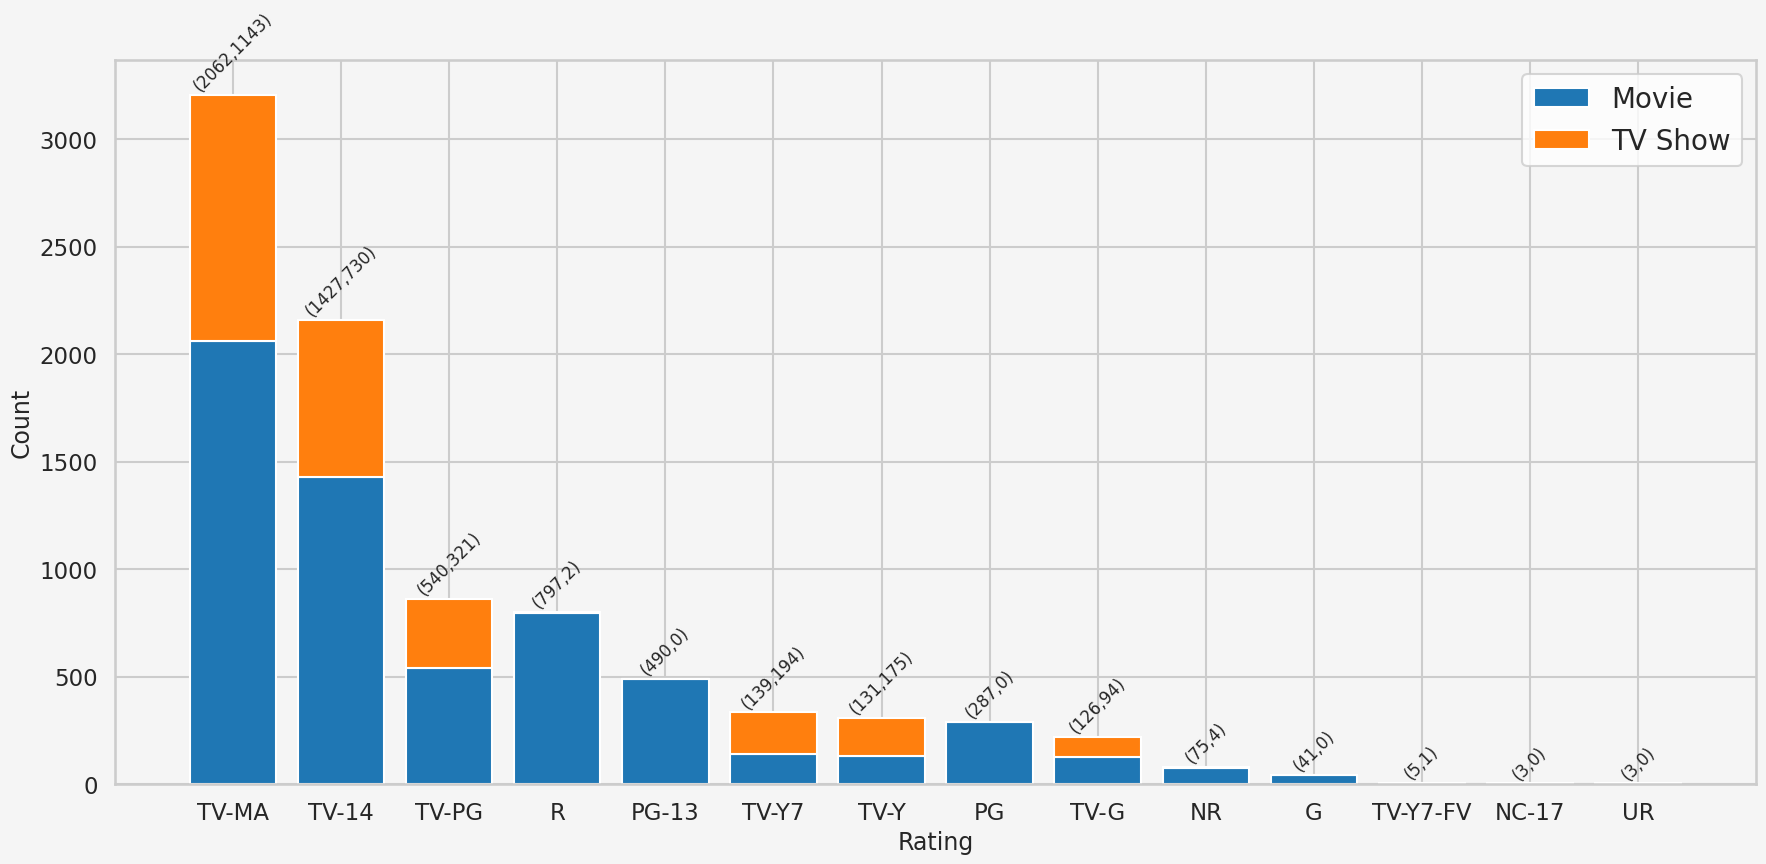

In [44]:

movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts.fillna(0, inplace=True)  # Fill missing values with 0
df_counts['total_by_type'] = df_counts.sum(axis=1)

rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

# Set Seaborn style
sns.set(style="whitegrid", context="talk")

# Create the bar plot
fig, ax = plt.subplots(figsize=(18, 9))

# Plot the stacked bar chart
ax.bar(rating_agg.index, rating_agg['Movie'], label='Movie', color='#1f77b4')
ax.bar(rating_agg.index, rating_agg['TV Show'], bottom=rating_agg['Movie'], label='TV Show', color='#ff7f0e')

# Add labels on top of the bars
for idx, row in rating_agg.iterrows():
    total_label = f"({int(row['Movie'])},{int(row['TV Show'])})"
    y_pos = row['Movie'] + row['TV Show']  # Adjust based on bar width
    ax.text(idx, y_pos, total_label, ha='center', va='bottom', fontsize=12, rotation=45)  # Customize label position and size

# Customize the plot
ax.set_xlabel('Rating', fontsize=17)
ax.set_ylabel('Count', fontsize=17)
ax.legend(loc='upper right', prop={'size': 20})
plt.xticks(rotation=0)

# Set the background color to whitesmoke
fig.patch.set_facecolor('whitesmoke')
ax.set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()


# How has content been added over the years?¶
 As we saw in the timeline at the start of this analysis, Netflix went global in 2016 - and it is extremely noticeable in this plot.
 
 The increase is Movie content is remarkable.

In [21]:
movie_counts_year = df[df['type'] == 'Movie']['year_added'].value_counts()
tv_show_counts_year = df[df['type'] == 'TV Show']['year_added'].value_counts()

df_counts = pd.DataFrame({'Movie': movie_counts_year, 'TV Show': tv_show_counts_year})
df_counts['total_by_year'] = df_counts.sum(axis=1)

rating_agg = df_counts.sort_values(by='year_added', ascending=False)

print(rating_agg)

            Movie  TV Show  total_by_year
year_added                               
2021          993    505.0         1498.0
2020         1284    595.0         1879.0
2019         1424    592.0         2016.0
2018         1237    411.0         1648.0
2017          836    349.0         1185.0
2016          251    175.0          426.0
2015           56     26.0           82.0
2014           19      5.0           24.0
2013            6      5.0           11.0
2012            3      NaN            3.0
2011           13      NaN           13.0
2010            1      NaN            1.0
2009            2      NaN            2.0
2008            1      1.0            2.0
